In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy.stats import iqr

In [2]:
airbnb_df = pd.read_csv(r'AirBnB.csv')

In [51]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [3]:
airbnb_df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [54]:
airbnb_df = airbnb_df.astype({'Multiple Rooms':'float','Business':'float','Bedrooms':'float'})

In [55]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  float64
 9   Business                     41714 non-null  float64
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  float64
 13  City Center (km)

In [56]:
def boolstr_to_floatstr(v):
    if v == 'True':
        return '1'
    elif v == 'False':
        return '0'
    else:
        return v

In [58]:
airbnb_df['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Shared Room']).astype(float)

In [63]:
airbnb_df['Shared Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Shared Room']).astype(float)
airbnb_df['Private Room'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Private Room']).astype(float)
airbnb_df['Superhost'] = np.vectorize(boolstr_to_floatstr)(airbnb_df['Superhost']).astype(float)

In [64]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  float64
 5   Private Room                 41714 non-null  float64
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  float64
 8   Multiple Rooms               41714 non-null  float64
 9   Business                     41714 non-null  float64
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  float64
 13  City Center (km)

In [6]:
numerical_df = airbnb_df.select_dtypes(include='int64')
categorical_df = airbnb_df.select_dtypes(include='object')

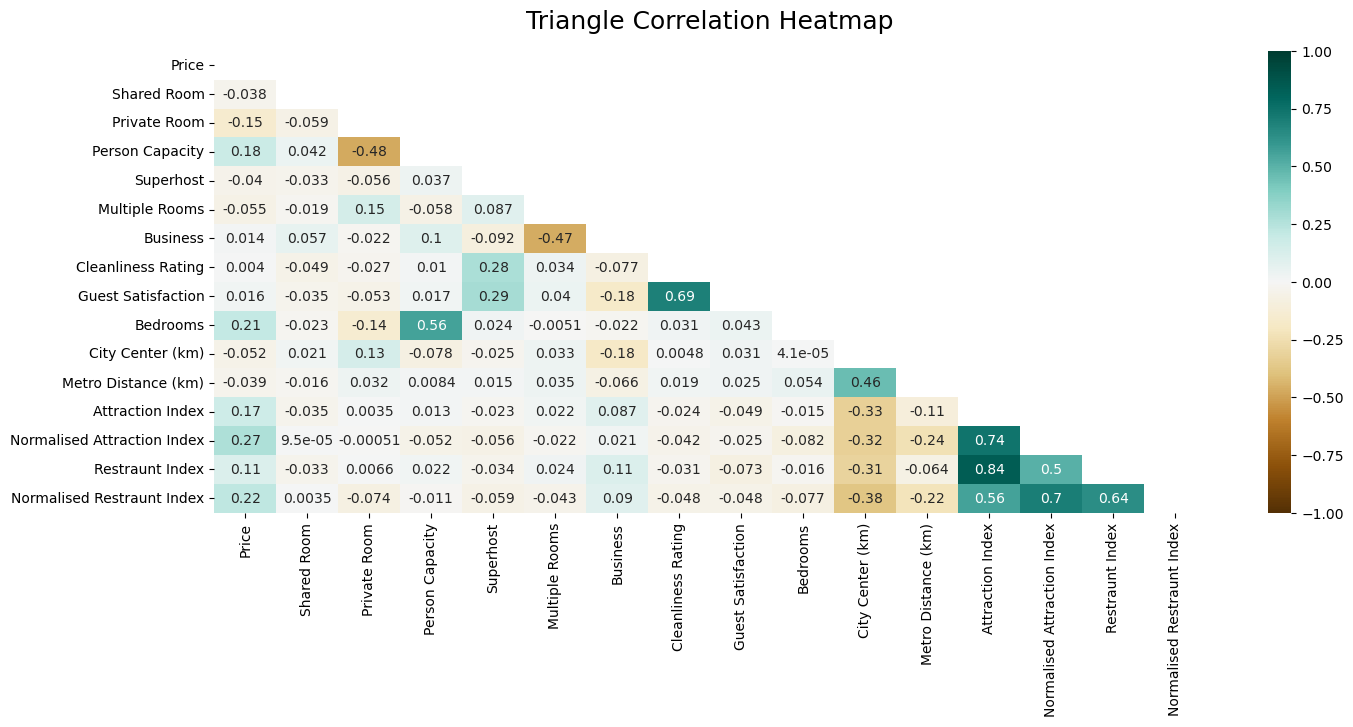

In [8]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [11]:
airbnb_df2 = airbnb_df.drop(columns=['Attraction Index', 'Restraunt Index'])

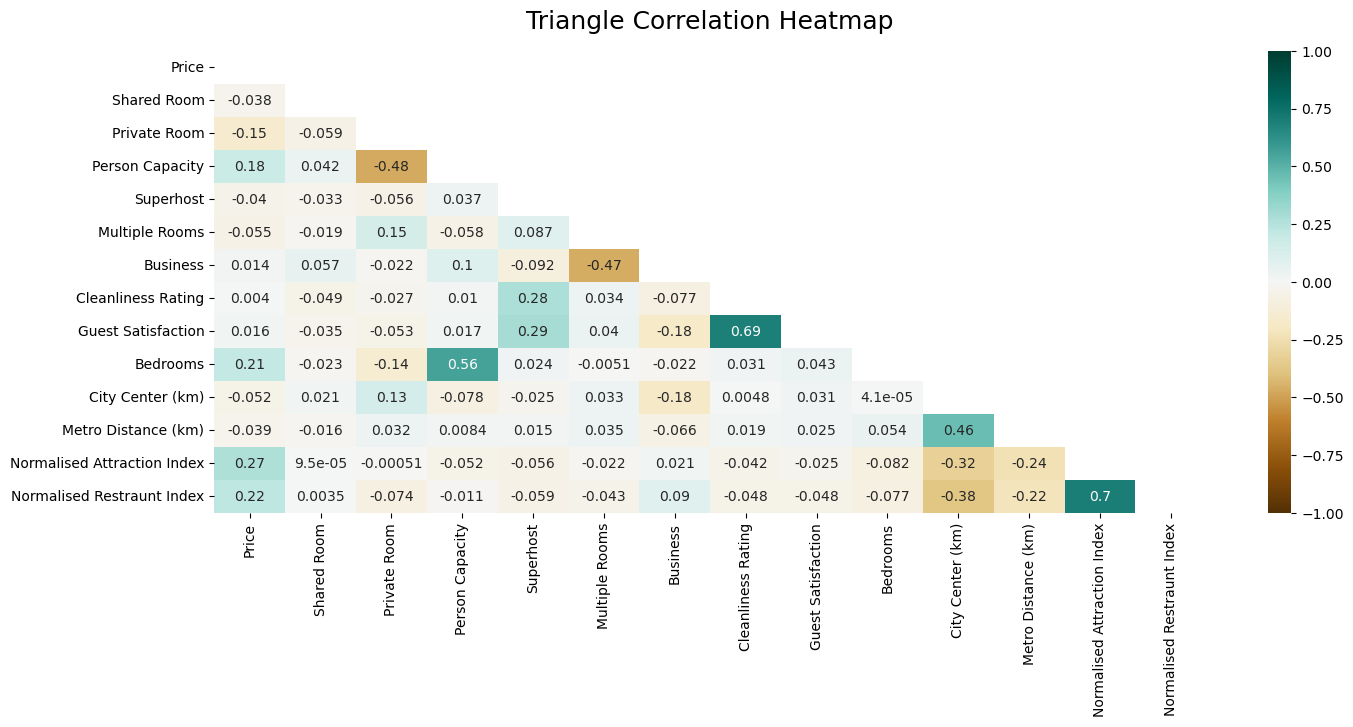

In [12]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(airbnb_df2.corr(), dtype='bool'))
heatmap = sns.heatmap(airbnb_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [34]:
airbnb_df2['Bedrooms'][airbnb_df2['Bedrooms'] == 0].count()

3745

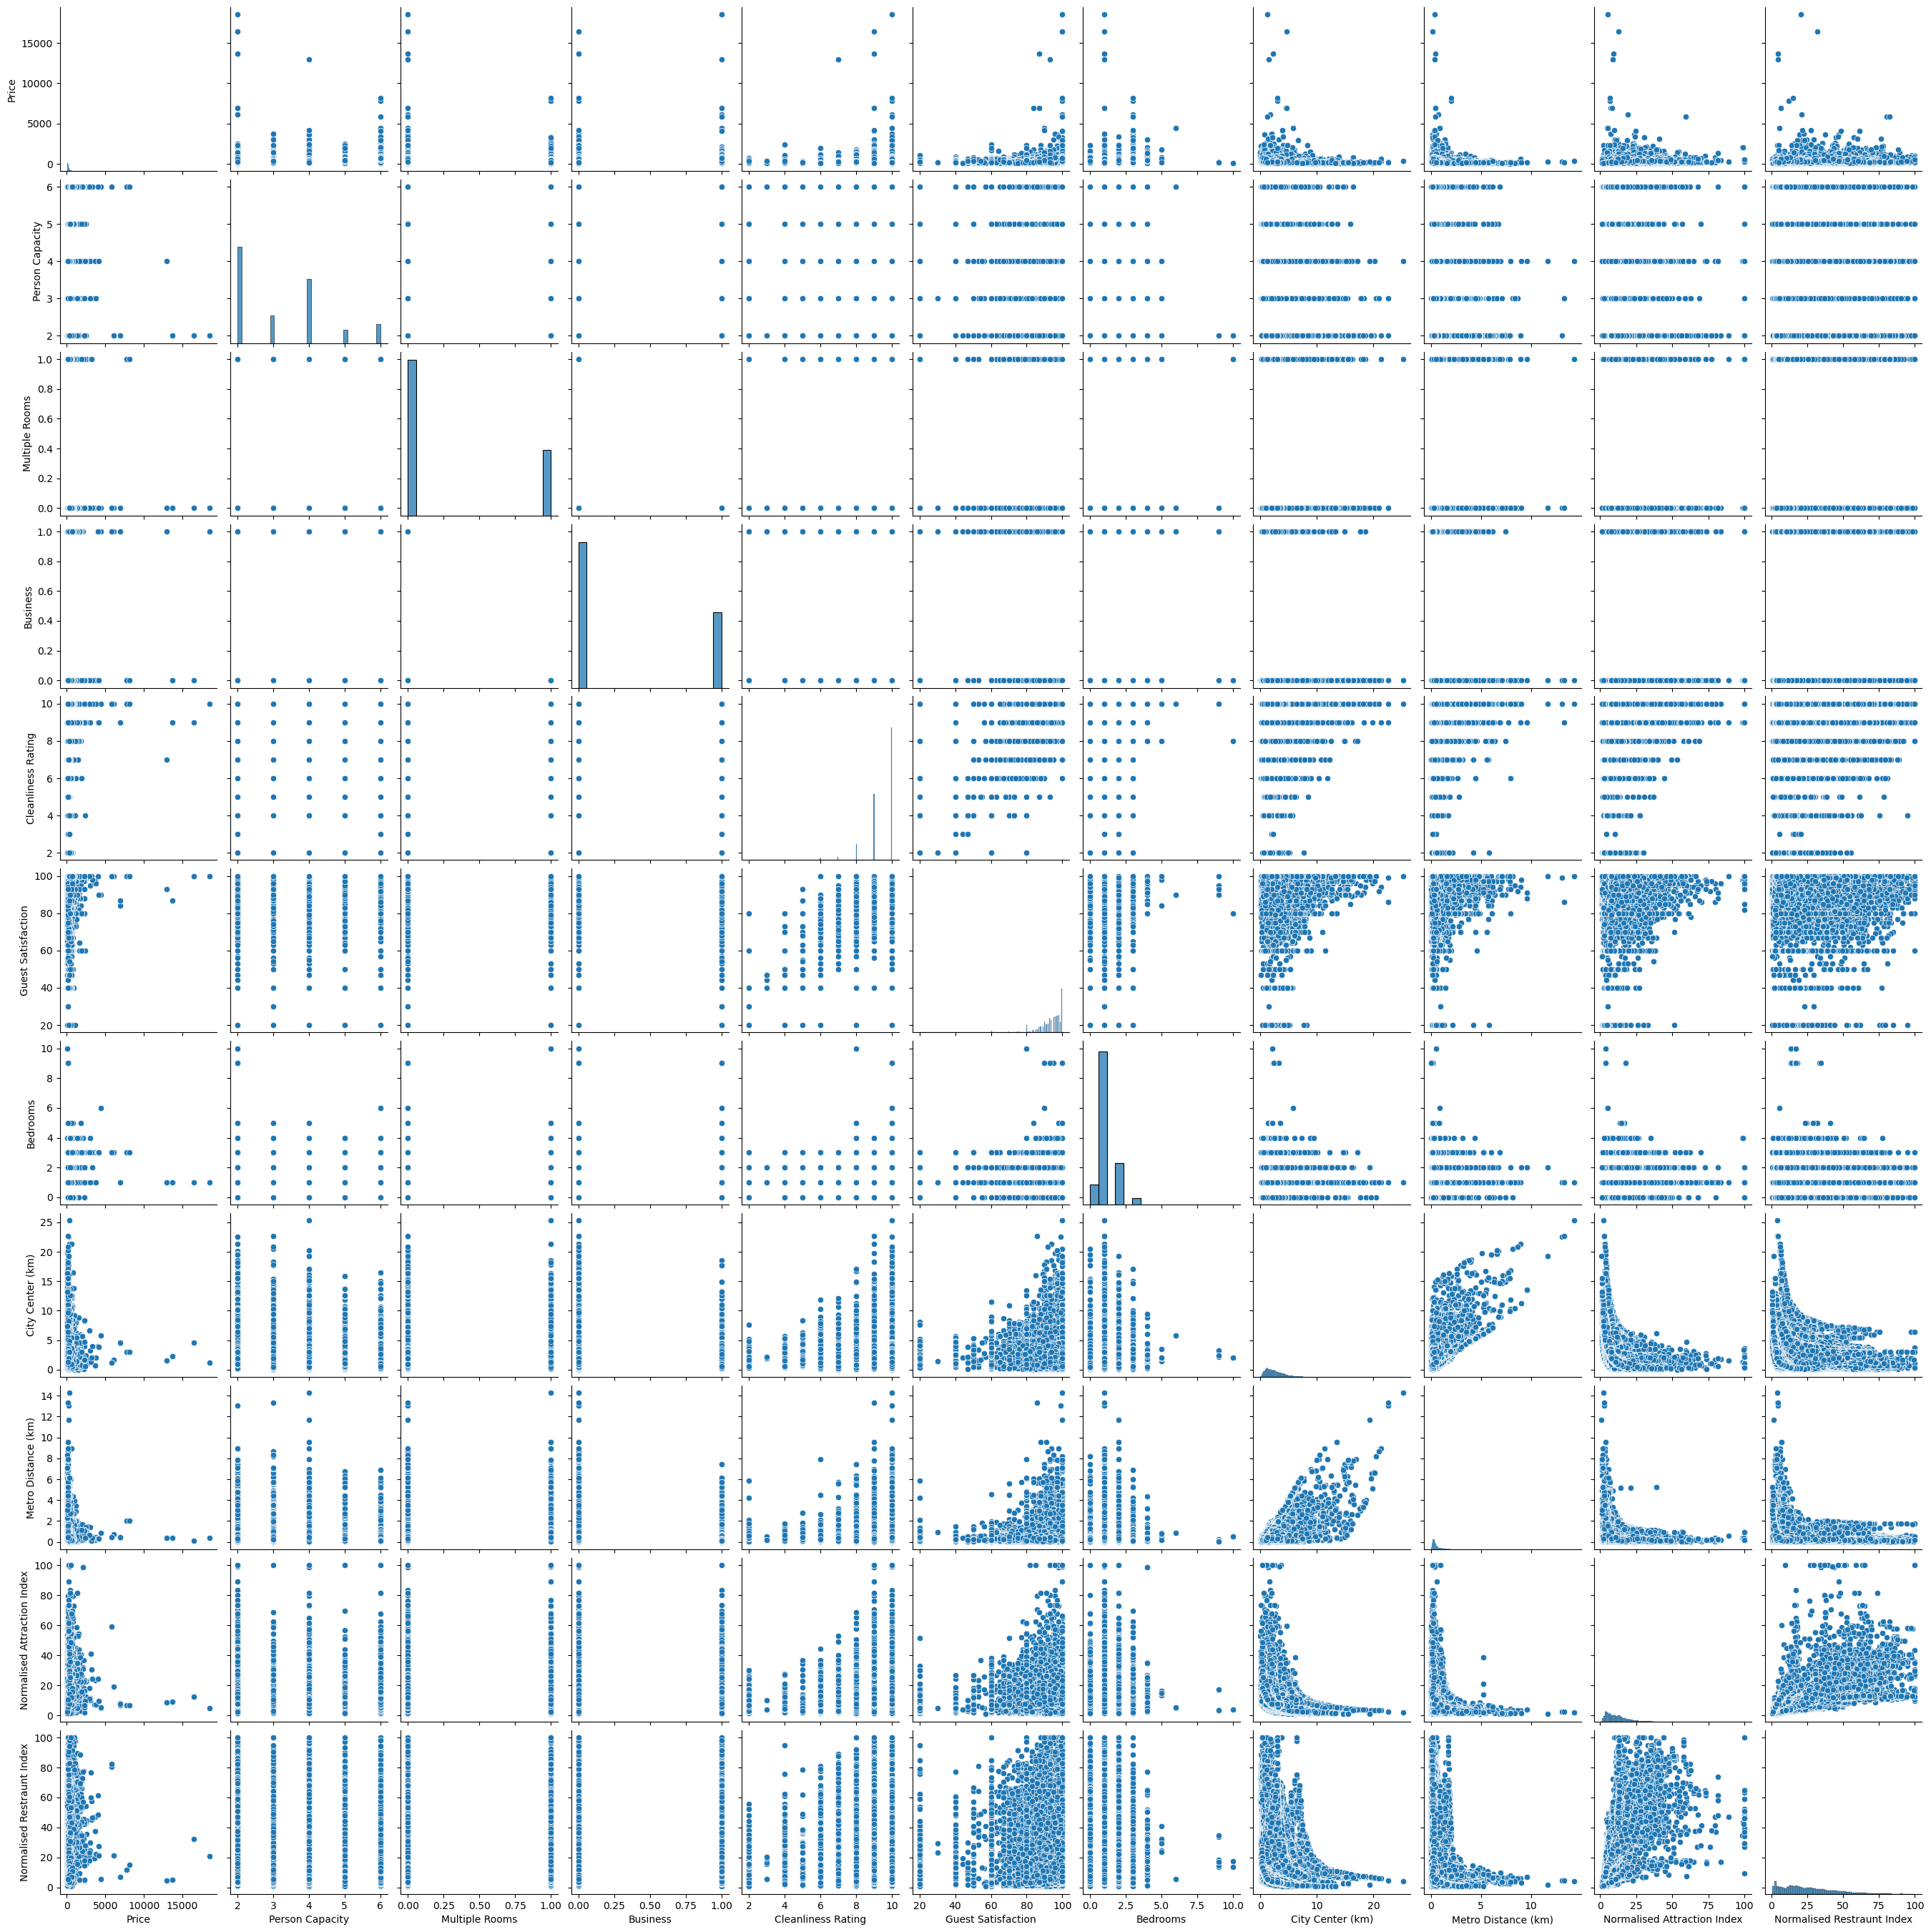

In [14]:
sns.pairplot(airbnb_df2.select_dtypes(np.number))

In [41]:
airbnb_df2['Price'][airbnb_df2['Price'] > 5000].count()

14

In [40]:
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [47]:
airbnb_df3 = remove_outliers(numerical_df)

In [50]:
airbnb_df3

,Multiple Rooms,Business,Bedrooms
0,1,0,NaN
1,0,0,NaN
2,0,1,NaN
3,0,1,NaN
4,0,0,NaN
...,...,...,...
41709,0,1,NaN
41710,0,0,NaN
41711,0,0,NaN
41712,0,0,NaN
